In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset

df = pd.read_csv("raw data.csv")

In [3]:
# Checking the shape of the data (rows, columns)

df.shape

(12000, 11)

In [4]:
# Checking data types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               12000 non-null  object 
 1   Age                   12000 non-null  int64  
 2   Gender                12000 non-null  object 
 3   Marital_Status        12000 non-null  object 
 4   Employment_Type       12000 non-null  object 
 5   Annual_Income         12000 non-null  float64
 6   Loan_Amount           12000 non-null  float64
 7   Loan_Term             12000 non-null  int64  
 8   Credit_Score          12000 non-null  int64  
 9   Debt_to_Income_Ratio  12000 non-null  float64
 10  Loan_Status           12000 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 1.0+ MB


In [5]:
# Viewing the first few rows of the data

df.head()

Loan_ID  Age  Gender Marital_Status Employment_Type  Annual_Income  \
0   L0001   59  Female         Single   Self-employed       71944.33   
1   L0002   49    Male        Married        Salaried       20000.00   
2   L0003   35  Female        Married        Salaried       40308.05   
3   L0004   63  Female         Single      Unemployed       20000.00   
4   L0005   28  Female        Married   Self-employed       20000.00   

   Loan_Amount  Loan_Term  Credit_Score  Debt_to_Income_Ratio Loan_Status  
0     76552.53         48           742                   0.5    Rejected  
1     29750.36         24           624                   0.5    Approved  
2     49300.23         24           579                   0.5    Rejected  
3     10986.38         12           707                   0.5    Rejected  
4     15502.96         36           664                   0.5    Rejected

# Univariate Analysis

In [6]:
# Summary statistics of all columns

df.describe(include ='all')

Loan_ID           Age Gender Marital_Status Employment_Type  \
count    12000  12000.000000  12000          12000           12000   
unique   12000           NaN      2              3               3   
top      L0001           NaN   Male        Married        Salaried   
freq         1           NaN   7249           5935            7265   
mean       NaN     43.011250    NaN            NaN             NaN   
std        NaN     12.890001    NaN            NaN             NaN   
min        NaN     21.000000    NaN            NaN             NaN   
25%        NaN     32.000000    NaN            NaN             NaN   
50%        NaN     43.000000    NaN            NaN             NaN   
75%        NaN     54.000000    NaN            NaN             NaN   
max        NaN     65.000000    NaN            NaN             NaN   

        Annual_Income    Loan_Amount     Loan_Term  Credit_Score  \
count    12000.000000   12000.000000  12000.000000  12000.000000   
unique            NaN            NaN           NaN           NaN   
top               NaN            NaN           NaN           NaN   
freq              NaN            NaN           NaN           NaN   
mean     51215.638375   76927.973356     30.556000    650.173250   
std      33462.448191   61897.686697     14.635461     50.078882   
min      20000.000000   10034.930000     12.000000    448.000000   
25%      24093.145000   35111.195000     12.000000    617.000000   
50%      41651.860000   56541.080000     36.000000    650.000000   
75%      66700.872500   98989.017500     36.000000    684.000000   
max     200000.000000  491476.610000     60.000000    850.000000   

        Debt_to_Income_Ratio Loan_Status  
count           12000.000000       12000  
unique                   NaN           2  
top                      NaN    Rejected  
freq                     NaN        6735  
mean                0.499960         NaN  
std                 0.000991         NaN  
min                 0.460000         NaN  
25%                 0.500000         NaN  
50%                 0.500000         NaN  
75%                 0.500000         NaN  
max                 0.500000         NaN

In [7]:
# Checking for fake missing values (like '', ' ', 'NaN', etc.)

for col in df.columns:
    print(f"{col}: {df[col].isin(['', ' ', 'NaN', 'NULL', None]).sum()} fake-missing values")


Loan_ID: 0 fake-missing values
Age: 0 fake-missing values
Gender: 0 fake-missing values
Marital_Status: 0 fake-missing values
Employment_Type: 0 fake-missing values
Annual_Income: 0 fake-missing values
Loan_Amount: 0 fake-missing values
Loan_Term: 0 fake-missing values
Credit_Score: 0 fake-missing values
Debt_to_Income_Ratio: 0 fake-missing values
Loan_Status: 0 fake-missing values


In [8]:
# Checking data types of each column
df.dtypes


Loan_ID                  object
Age                       int64
Gender                   object
Marital_Status           object
Employment_Type          object
Annual_Income           float64
Loan_Amount             float64
Loan_Term                 int64
Credit_Score              int64
Debt_to_Income_Ratio    float64
Loan_Status              object
dtype: object

<Axes: xlabel='Loan_Status', ylabel='count'>

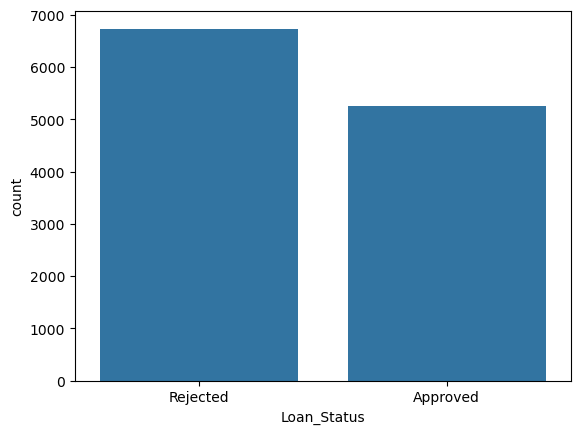

In [9]:
# Countplot to see how many loans are Approved vs Rejected

sns.countplot(x ='Loan_Status', data = df)

<Axes: xlabel='Gender', ylabel='Annual_Income'>

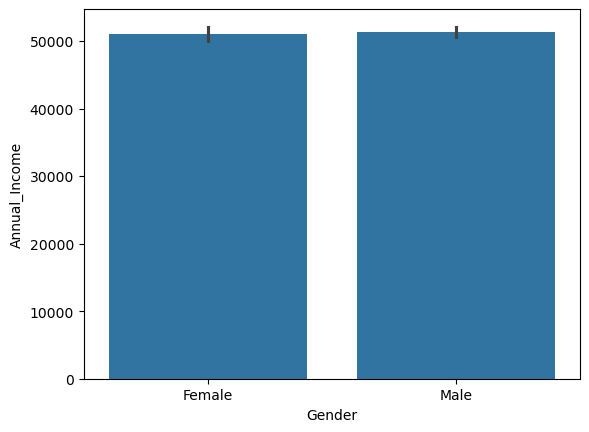

In [10]:
# Barplot to see average Annual Income by Gender

sns.barplot(x='Gender', y='Annual_Income', data = df)

In [11]:
# Summary statistics of numerical columns

summary = df[['Annual_Income', 'Credit_Score', 'Loan_Amount']].describe()
print(summary)

       Annual_Income  Credit_Score    Loan_Amount
count   12000.000000  12000.000000   12000.000000
mean    51215.638375    650.173250   76927.973356
std     33462.448191     50.078882   61897.686697
min     20000.000000    448.000000   10034.930000
25%     24093.145000    617.000000   35111.195000
50%     41651.860000    650.000000   56541.080000
75%     66700.872500    684.000000   98989.017500
max    200000.000000    850.000000  491476.610000


# Bivariate Analysis

In [12]:
# Debt_to_Income_Ratio calculation with randomness
df['Debt_to_Income_Ratio'] = (df['Loan_Amount'] / df['Annual_Income'])

# Clip to keep within a reasonable range (10% to 50%)
df['Debt_to_Income_Ratio'] = df['Debt_to_Income_Ratio'].clip(lower=0.1, upper=0.5)

# Add slight random noise to make the values less flat
df['Debt_to_Income_Ratio'] += np.random.normal(loc=0, scale=0.02, size=len(df))

# Clip again to stay within bounds after adding noise
df['Debt_to_Income_Ratio'] = df['Debt_to_Income_Ratio'].clip(lower=0.1, upper=0.6)


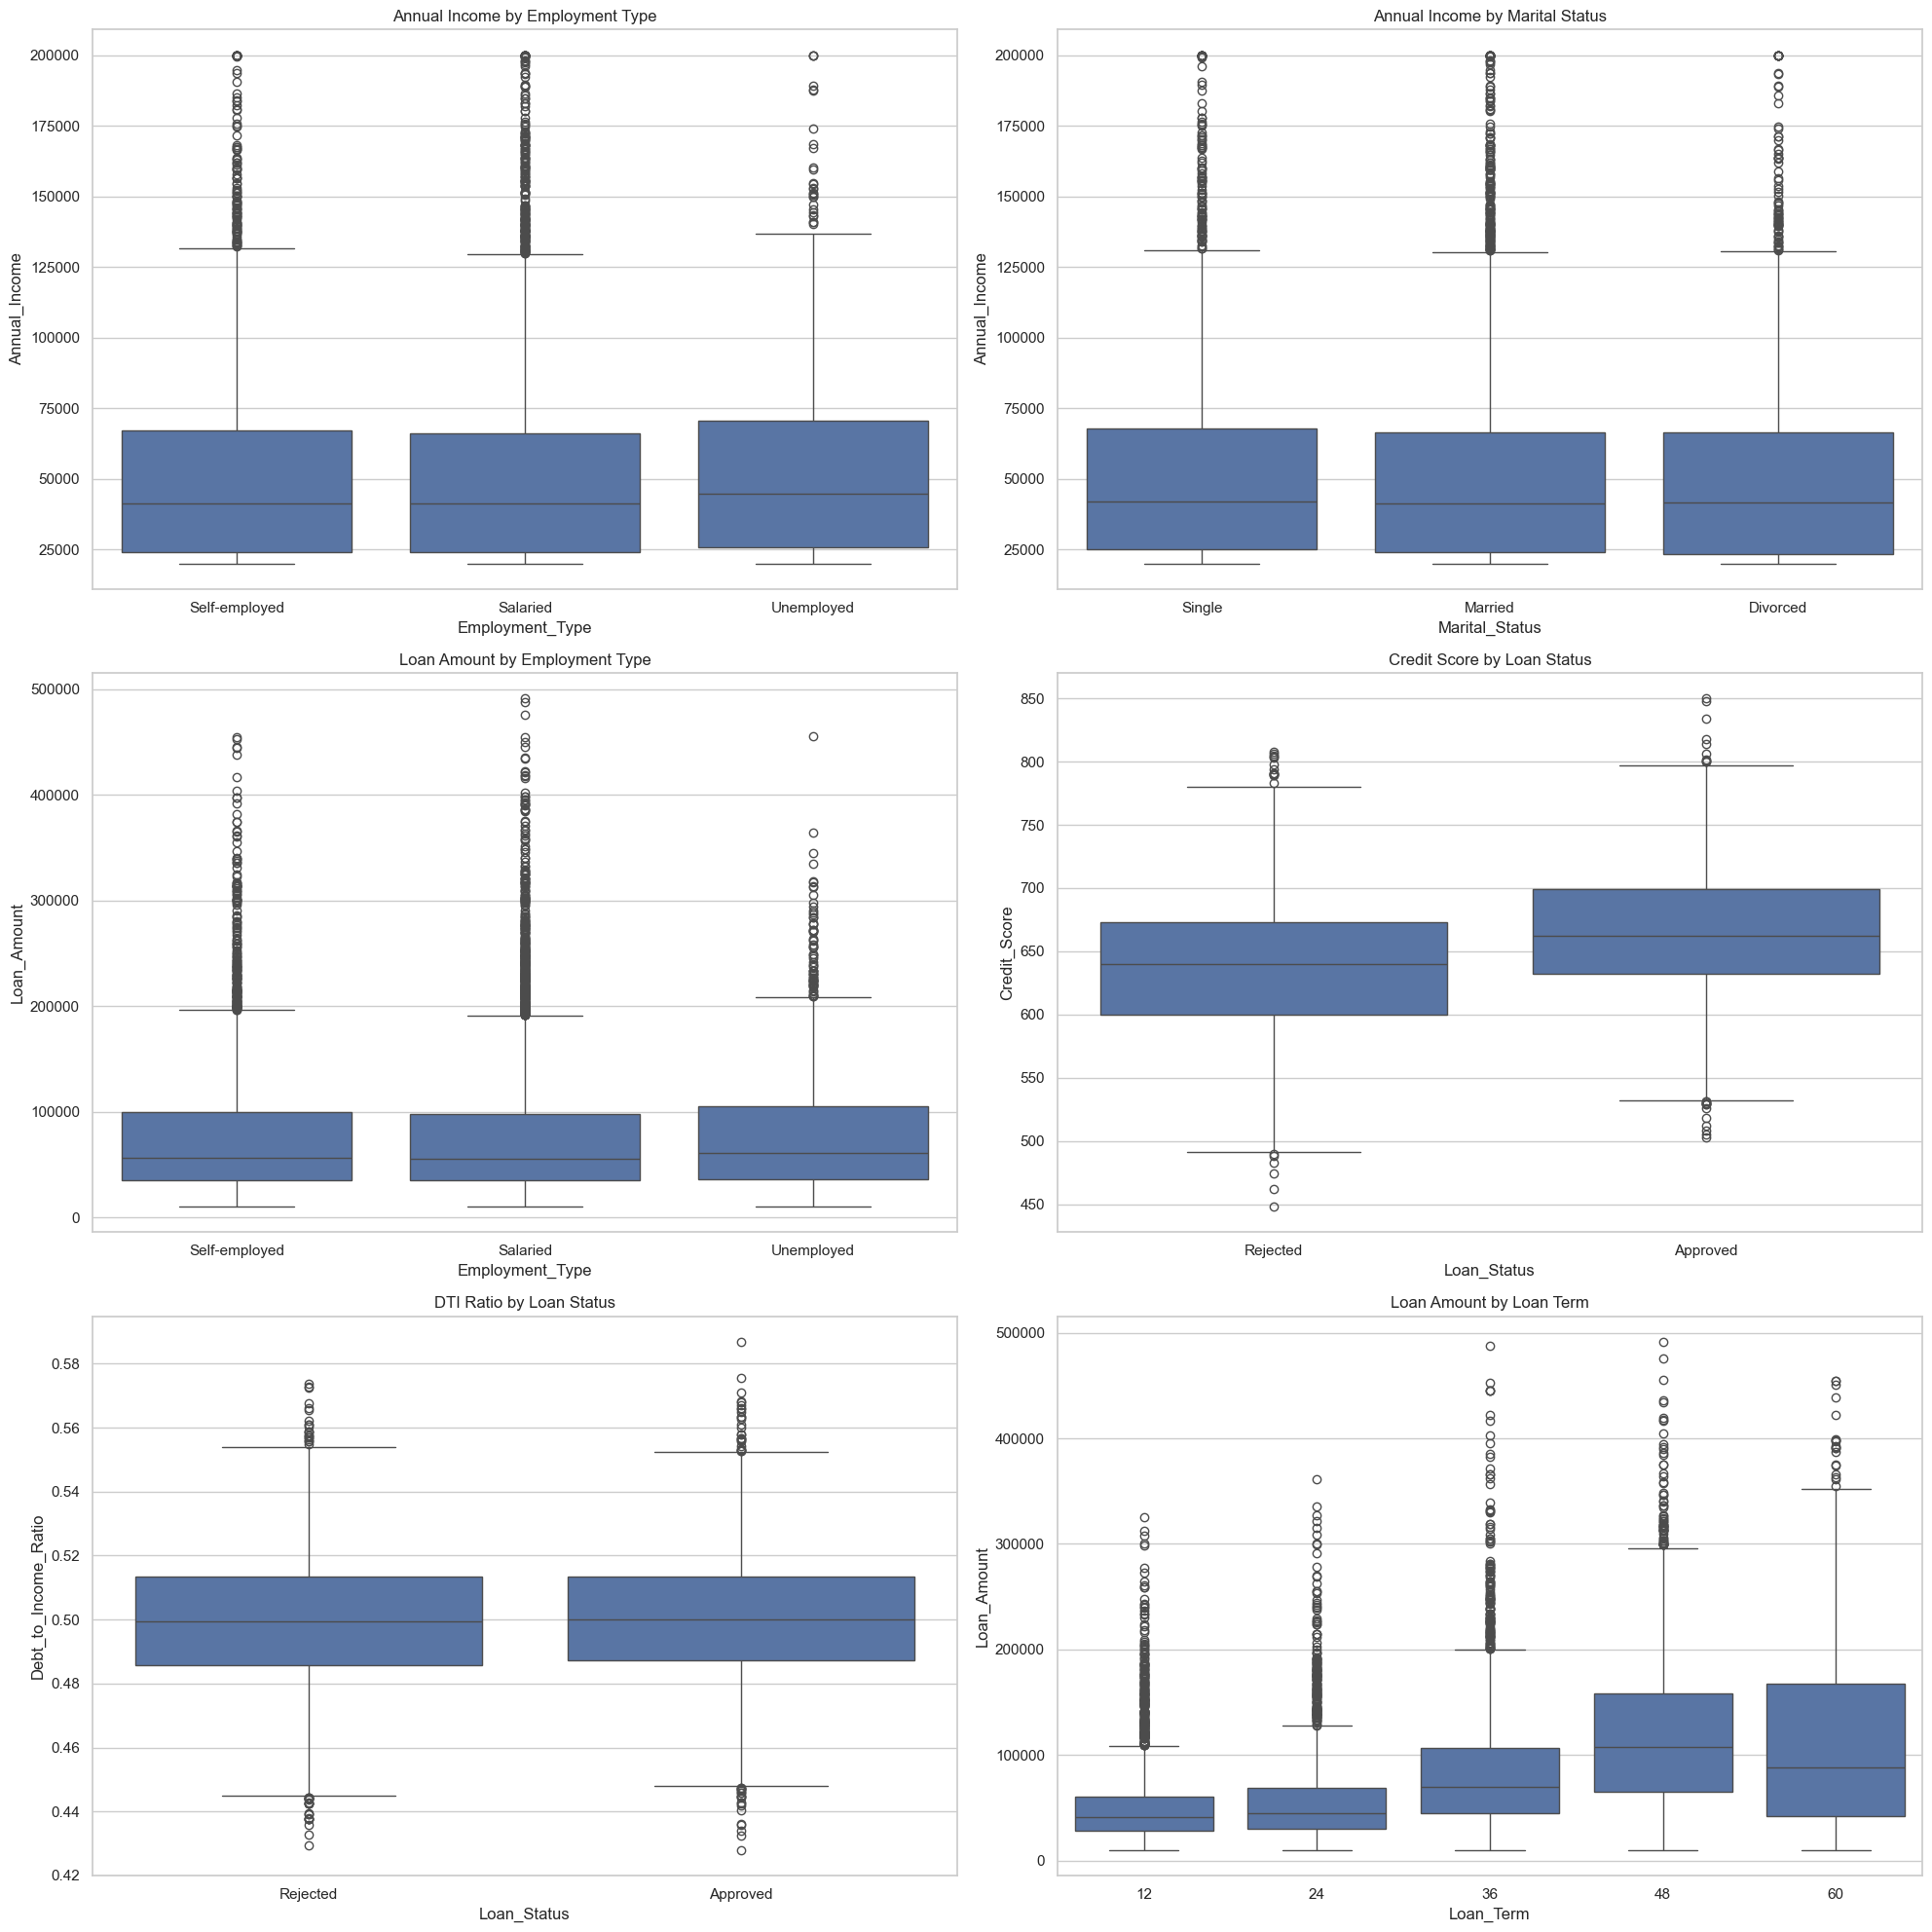

In [13]:
# Boxplots to see relationships between two variables

sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

# Annual_Income by Employment_Type
plt.subplot(3, 2, 1)
sns.boxplot(x='Employment_Type', y='Annual_Income', data=df)
plt.title('Annual Income by Employment Type')

# Annual_Income by Marital_Status
plt.subplot(3, 2, 2)
sns.boxplot(x='Marital_Status', y='Annual_Income', data=df)
plt.title('Annual Income by Marital Status')

# Loan_Amount by Employment_Type
plt.subplot(3, 2, 3)
sns.boxplot(x='Employment_Type', y='Loan_Amount', data=df)
plt.title('Loan Amount by Employment Type')

# Credit_Score by Loan_Status
plt.subplot(3, 2, 4)
sns.boxplot(x='Loan_Status', y='Credit_Score', data=df)
plt.title('Credit Score by Loan Status')

# Debt_to_Income_Ratio by Loan_Status
plt.subplot(3, 2, 5)
sns.boxplot(x='Loan_Status', y='Debt_to_Income_Ratio', data=df)
plt.title('DTI Ratio by Loan Status')

# Loan_Amount by Loan_Term
plt.subplot(3, 2, 6)
sns.boxplot(x='Loan_Term', y='Loan_Amount', data=df)
plt.title('Loan Amount by Loan Term')

plt.tight_layout()
plt.show()

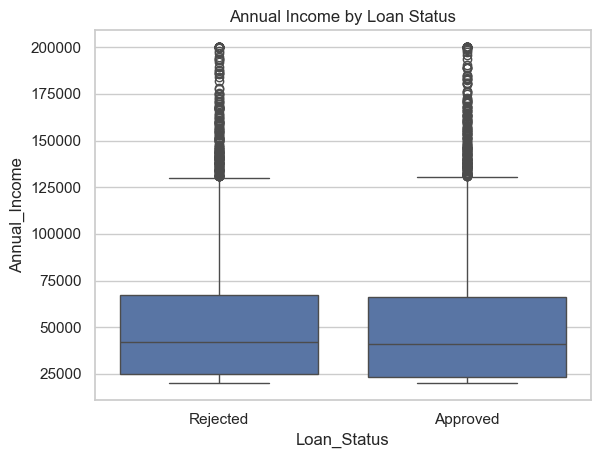

In [14]:
sns.boxplot(x='Loan_Status', y='Annual_Income', data=df)
plt.title('Annual Income by Loan Status')
plt.show()

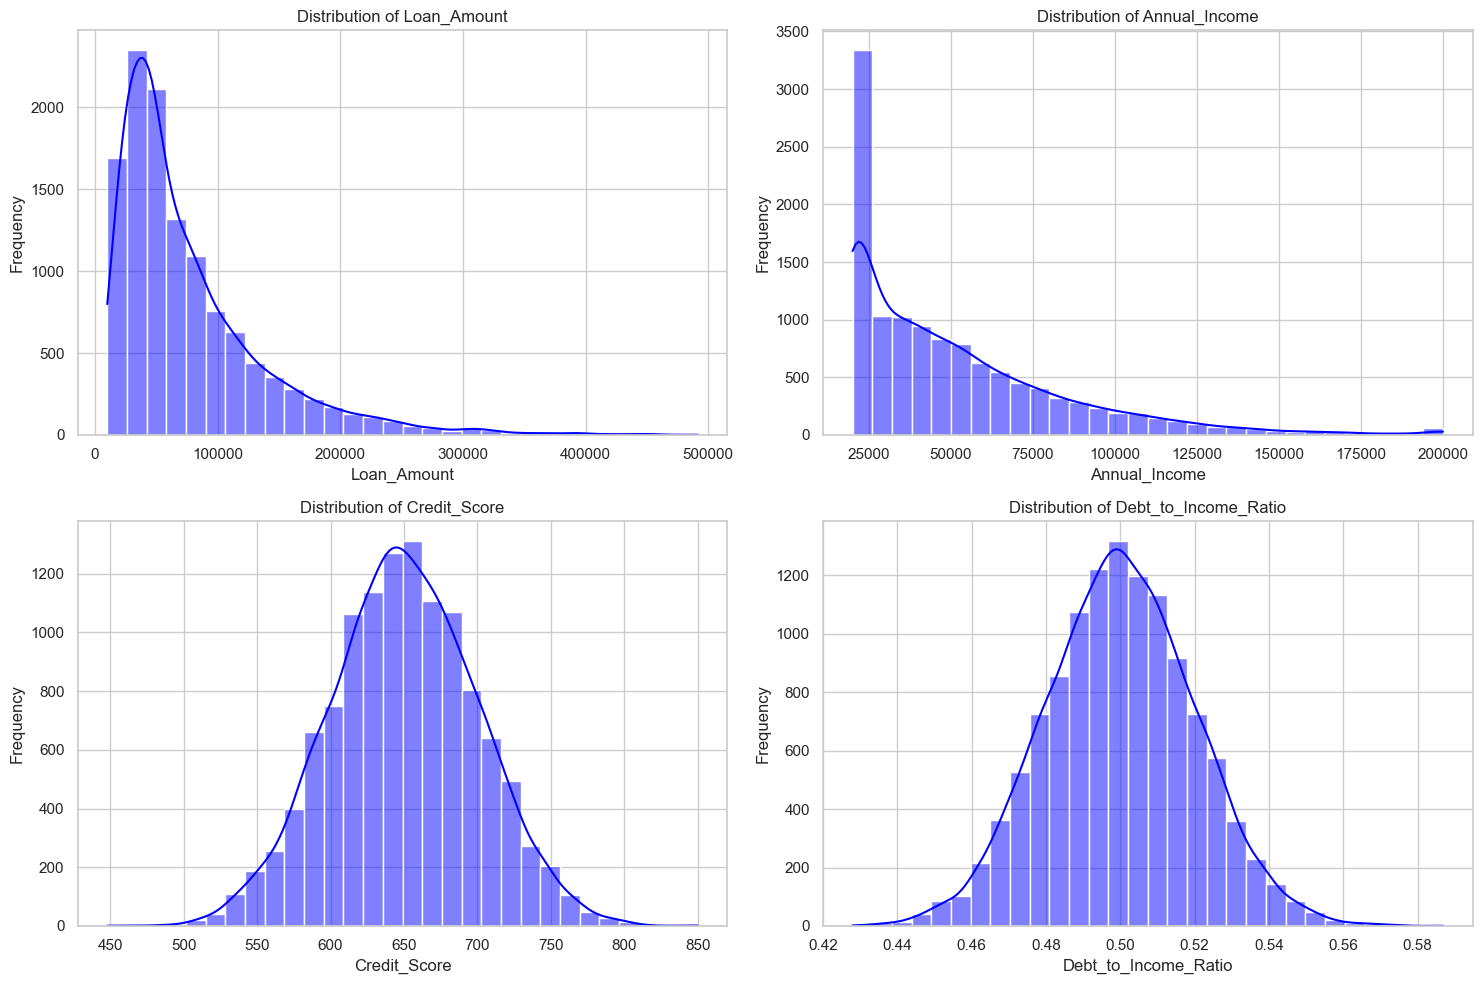

In [15]:
# Histograms to see the distribution of numerical columns

sns.set(style="whitegrid")

num_cols = ['Loan_Amount', 'Annual_Income', 'Credit_Score', 'Debt_to_Income_Ratio']

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

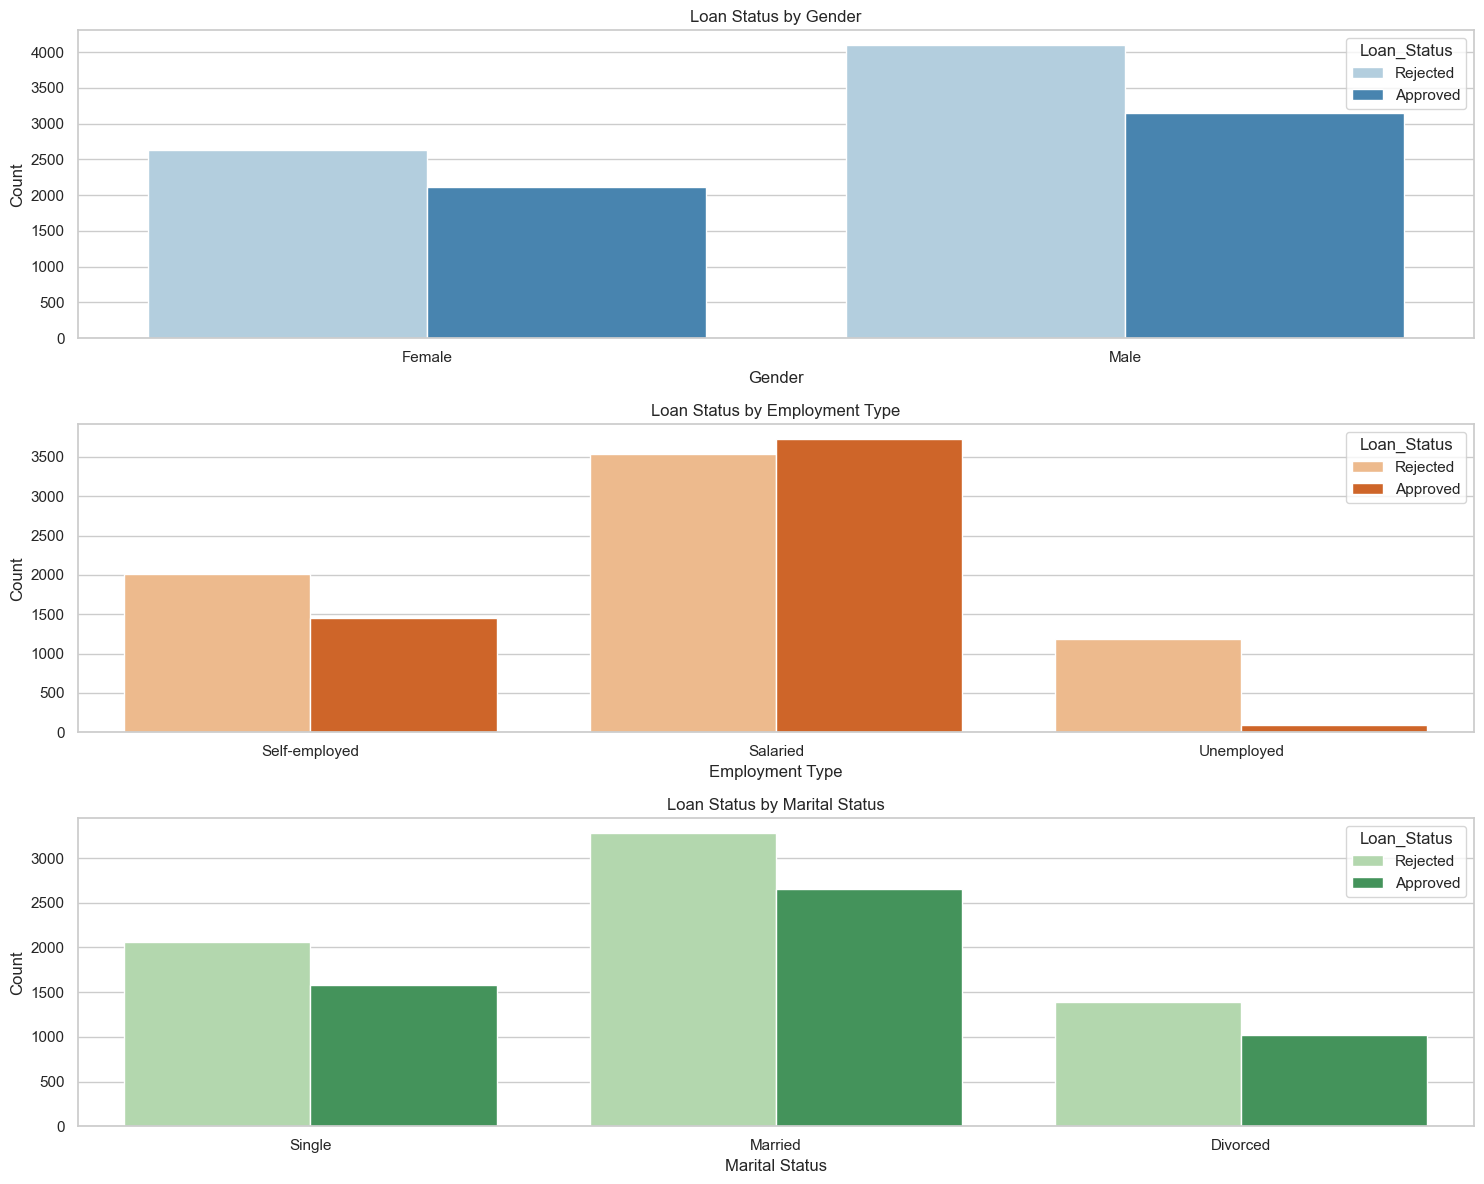

In [16]:
# Countplots to see relationships between categorical variables

sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

# Loan Status by Gender 
plt.subplot(3, 1, 1)
sns.countplot(x='Gender', hue='Loan_Status', data=df, palette='Blues')
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Loan Status by Employment Type
plt.subplot(3, 1, 2)
sns.countplot(x='Employment_Type', hue='Loan_Status', data=df, palette='Oranges')
plt.title('Loan Status by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')

# Loan Status by Marital Status 
plt.subplot(3, 1, 3)
sns.countplot(x='Marital_Status', hue='Loan_Status', data=df, palette='Greens')
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

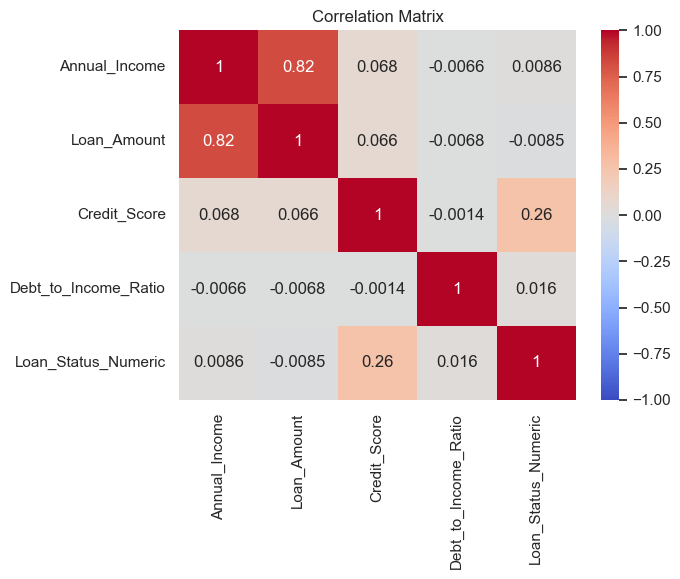

In [17]:
# Correlation Matrix to see relationships between numerical columns

df['Loan_Status_Numeric'] = df['Loan_Status'].map({'Approved': 1, 'Rejected': 0})
numeric_cols = ['Annual_Income', 'Loan_Amount', 'Credit_Score', 'Debt_to_Income_Ratio', 'Loan_Status_Numeric']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [18]:
df.to_csv('clean_data.csv', index=False)

# Summary of Insights
Most Impactful Factors: Credit_Score (higher → better approval), Debt_to_Income_Ratio (lower → better approval), and Employment_Type (Salaried → highest approval).
                                                                                                                                      
Less Impactful: Gender (minimal impact), Annual_Income (moderate impact).

Focus Areas: Prioritize applicants with high credit scores (>700), low DTI (<0.3), and stable employment (Salaried).